<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Pytorch_Neural_Network_Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Neural Network Design

In [2]:
class Model(nn.Module):

  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    # how many layers?
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

    #input layer(4 feature) --> h1(N)--> h2(N) --> output(3 classes)
    
  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [3]:
torch.manual_seed(32)
model = Model()

Importing Data as dataframe

In [6]:
df = pd.read_csv('iris.csv')

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


## Visualization

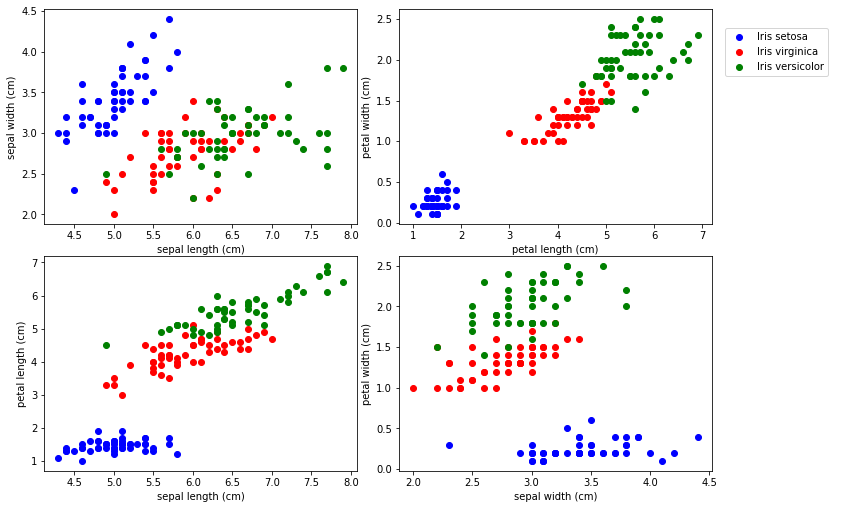

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

## Data Preperation

In [11]:
X = df.drop('target',axis=1)
y = df['target']

To be able to convert data to tensor we need to first convert them into numpy arrays as like below:

In [13]:
X = X.values
y = y.values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33) #random state is just an arbitrary number to match split size with anyone who will use same code

In [17]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [18]:
y_train = torch.LongTensor(y_train) #Used longtensor because we want targets as integers

In [19]:
y_test = torch.LongTensor(y_test)

In [20]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [21]:
epochs = 100
losses = []

for i in range(epochs):

  # forward and get a prediction
  y_pred = model.forward(X_train)
  # calculate loss/error
  loss = criterion(y_pred,y_train)
  losses.append(loss)
  if i%10==0:
    print('Epoch: {} and Loss: {}'.format(i,loss))
  #Backpropagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and Loss: 1.1507115364074707
Epoch: 10 and Loss: 0.9377315044403076
Epoch: 20 and Loss: 0.7798256278038025
Epoch: 30 and Loss: 0.6099401712417603
Epoch: 40 and Loss: 0.40079933404922485
Epoch: 50 and Loss: 0.25436317920684814
Epoch: 60 and Loss: 0.15053053200244904
Epoch: 70 and Loss: 0.10086943209171295
Epoch: 80 and Loss: 0.08128313720226288
Epoch: 90 and Loss: 0.07231426984071732


Text(0.5, 0, 'Epoch')

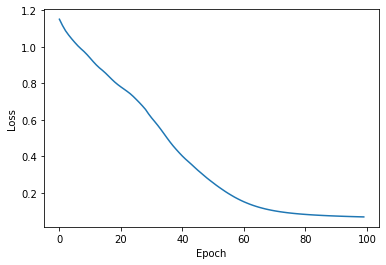

In [22]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

Attention that 'with torch.no_grad()' is very important command to say pytorch there is no optimization required on test evaluation phase

In [24]:
with torch.no_grad(): 
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)

In [25]:
loss

tensor(0.0581)

## Prediction and evaluation on test data

In [29]:
correct = 0
with torch.no_grad():

  for i,data in enumerate(X_test):

    y_val = model.forward(data)

    print('{}: {} belonging class: {}'.format(i+1,str(y_val),y_test[i]))

    if y_val.argmax().item() == y_test[i]:
      correct = correct + 1

print('We got {} number correct'.format(correct))

1: tensor([-2.1252,  4.8064, -0.8628]) belonging class: 1
2: tensor([-1.7985,  5.3098, -1.5449]) belonging class: 1
3: tensor([  6.3542,   0.8438, -10.0541]) belonging class: 0
4: tensor([-3.9123,  4.5958,  1.1693]) belonging class: 1
5: tensor([-7.4713,  3.2021,  5.7853]) belonging class: 2
6: tensor([-10.4976,   1.6459,   9.6297]) belonging class: 2
7: tensor([  6.3201,   0.9917, -10.1532]) belonging class: 0
8: tensor([  7.0468,   0.7059, -10.9137]) belonging class: 0
9: tensor([-7.2061,  3.3477,  5.3565]) belonging class: 2
10: tensor([-9.3960,  2.5759,  8.1033]) belonging class: 2
11: tensor([-9.8807,  2.3475,  8.7141]) belonging class: 2
12: tensor([ 6.2748,  0.6655, -9.7613]) belonging class: 0
13: tensor([-9.3142,  2.1880,  8.1947]) belonging class: 2
14: tensor([-3.7803,  4.5050,  1.0752]) belonging class: 1
15: tensor([-7.8657,  3.0117,  6.2303]) belonging class: 2
16: tensor([-1.8867,  5.1572, -1.3345]) belonging class: 1
17: tensor([-5.7006,  3.5030,  3.6696]) belonging cla

## Saving model (Just weights and biases)

In [31]:
torch.save(model.state_dict(),'my_iris_model.pt')

## Creating existing model from pt file

In [32]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

## Checking loaded model

In [34]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

## Saving model (Whole model including network)

In [35]:
torch.save(model,'my_iris_model_whole.pt')

## Evaluation on completely new data

In [39]:
new_iris = torch.tensor([5.6,3.7,2.2,0.5])

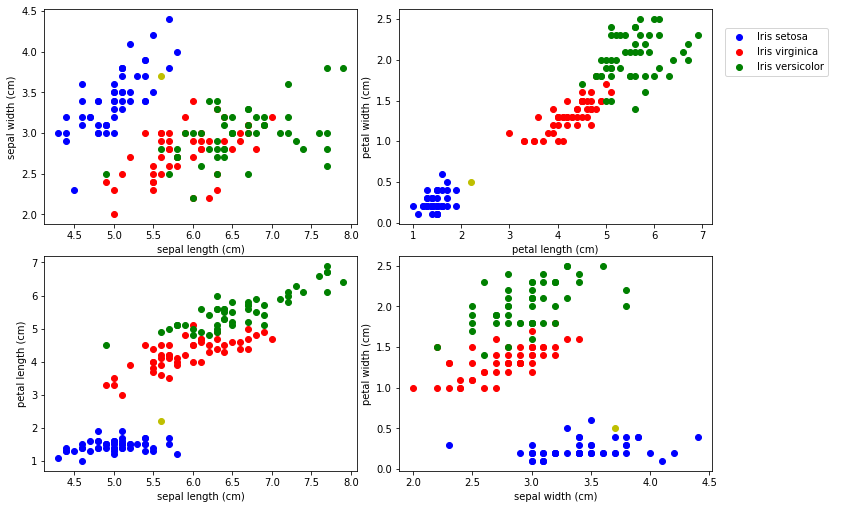

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
      
    ax.scatter(new_iris[plots[i][0]],new_iris[plots[i][1]],color='y')

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [46]:
with torch.no_grad():
  print(new_model(new_iris))
  print(new_model(new_iris).argmax().item())

tensor([  5.9522,   1.5596, -10.0054])
0
